# Employee Turnover Prediction

In [1]:
import warnings
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore') 


from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Acquire Data

In [2]:
df = pd.read_csv('data.csv')

## Describe data to Analyze

In [3]:
print(df.columns.values)

['satisfaction_level' 'last_evaluation' 'number_project'
 'average_montly_hours' 'time_spend_company' 'Work_accident' 'left'
 'promotion_last_5years' 'sales' 'salary']


In [4]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## Check for missing data

In [5]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

## Cast categorical data type to numerical

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Now check the distribution of Categorical features

In [7]:
df.describe(include=['O'])

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [8]:
df['salary'] = df['salary'].map( {'high':2 ,'medium': 1, 'low': 0} ).astype(int)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [9]:
df["sales"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [10]:
df['sales'] = df['sales'].map( {'sales':9 , 'accounting':8 , 'hr':7, 'technical':6,  'support':5,  'management':4, 'IT':3,  'product_mng':2,  'marketing':1,  'RandD':0} ).astype(float)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,9.0,0
1,0.80,0.86,5,262,6,0,1,0,9.0,1
2,0.11,0.88,7,272,4,0,1,0,9.0,1
3,0.72,0.87,5,223,5,0,1,0,9.0,0
4,0.37,0.52,2,159,3,0,1,0,9.0,0


## Find correlation of data and leaving rate

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,-0.015413,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.011855,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.005577,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.002387,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.001611,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,-0.019215,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.043814,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.015170,0.098119
sales,-0.015413,-0.011855,-0.005577,0.002387,0.001611,-0.019215,0.043814,-0.015170,1.000000,-0.033415
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,-0.033415,1.000000


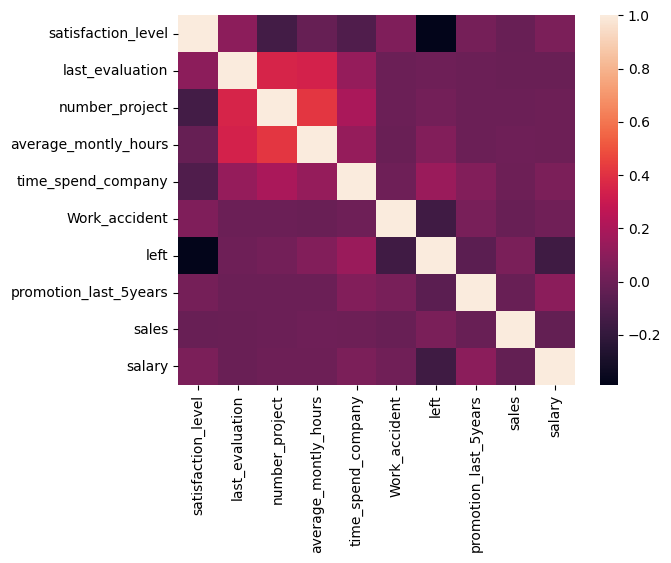

In [11]:
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

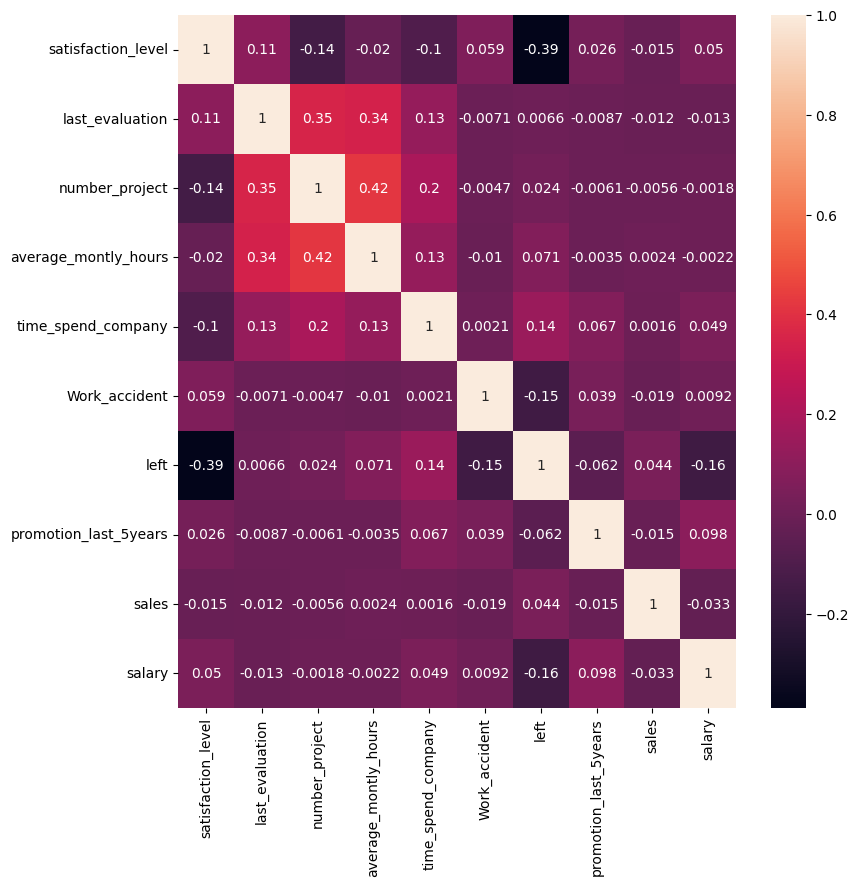

In [12]:
plt.figure(figsize=(9, 9))
sns.heatmap(corr, annot=True)
plt.show()

## Analyze by binary relationship table

In [13]:
df[['left', 'satisfaction_level']].groupby(['left'], as_index=False).mean().sort_values(by='satisfaction_level', ascending=False)

,left,satisfaction_level
0,0,0.666810
1,1,0.440098


In [14]:
df[['left', 'Work_accident']].groupby(['left'], as_index=False).mean().sort_values(by='Work_accident', ascending=False)

,left,Work_accident
0,0,0.175009
1,1,0.047326


In [15]:
df[['left', 'time_spend_company']].groupby(['time_spend_company'], as_index=False).mean().sort_values(by='left', ascending=False)

,time_spend_company,left
3,5,0.565513
2,4,0.348064
4,6,0.291086
1,3,0.246159
0,2,0.016338
5,7,0.000000
6,8,0.000000
7,10,0.000000


In [16]:
df[['left', 'salary']].groupby(['salary'], as_index=False).mean().sort_values(by='left', ascending=False)

,salary,left
0,0,0.296884
1,1,0.204313
2,2,0.066289


## Visualize and convert continuous data to discrete

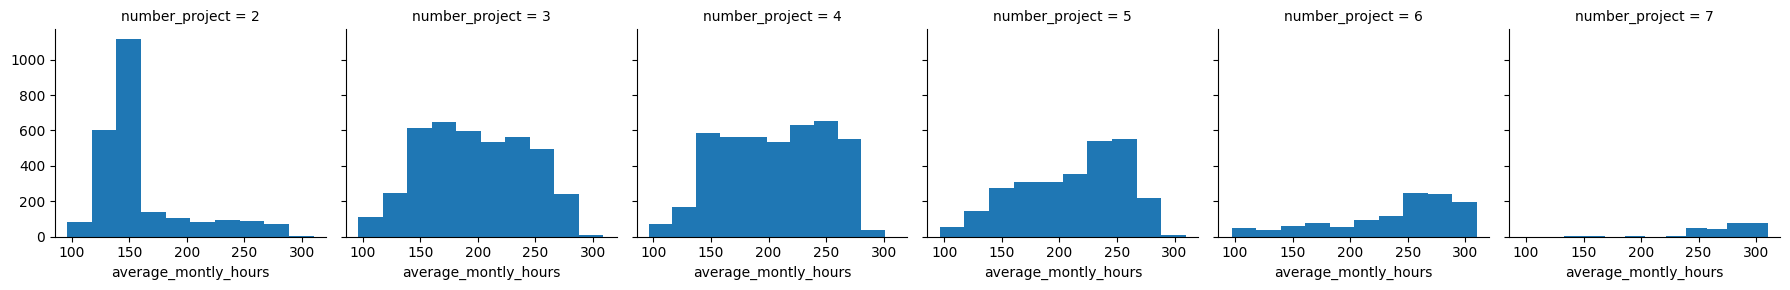

In [17]:
g = sns.FacetGrid(df, col='number_project')
g.map(plt.hist, 'average_montly_hours', bins=10)

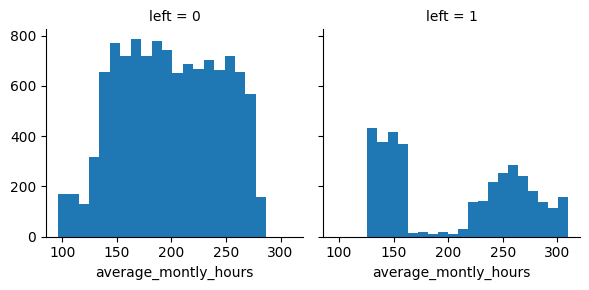

In [18]:
g = sns.FacetGrid(df, col='left')
g.map(plt.hist, 'average_montly_hours', bins=20)

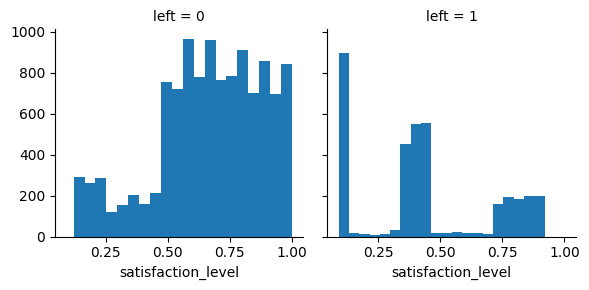

In [19]:
g = sns.FacetGrid(df, col='left')
g.map(plt.hist, 'satisfaction_level', bins=20)

In [20]:
#From the above graph, we see a high left rate between 0.25-0.5 and also >0.75
df.loc[ df['satisfaction_level'] <= 0.25, 'satisfaction_level'] = 0
df.loc[(df['satisfaction_level'] > 0.25) & (df['satisfaction_level'] <= 0.5), 'satisfaction_level'] = 1
df.loc[(df['satisfaction_level'] > 0.5) & (df['satisfaction_level'] <= 0.75), 'satisfaction_level']   = 0
df.loc[ df['satisfaction_level'] > 0.75, 'satisfaction_level'] = 1
df['satisfaction_level'] = df['satisfaction_level'].astype(int)

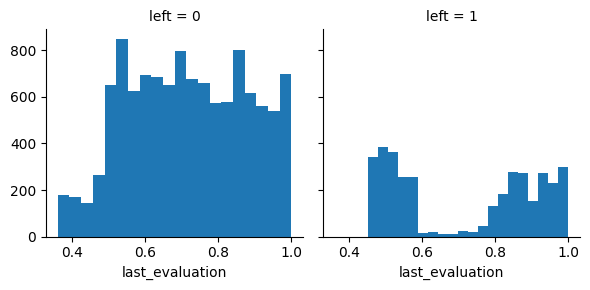

In [21]:
g = sns.FacetGrid(df, col='left')
g.map(plt.hist, 'last_evaluation', bins=20)

In [22]:
df.loc[ df['last_evaluation'] <= 0.56, 'last_evaluation'] = 0
df.loc[(df['last_evaluation'] > 0.56) & (df['last_evaluation'] <= 0.80), 'last_evaluation'] = 1
df.loc[ df['last_evaluation'] > 0.80, 'last_evaluation'] = 0
df['last_evaluation'] = df['last_evaluation'].astype(int)


## Create new column from existing data

In [23]:
df["proj*hour"] = df.number_project * df.average_montly_hours
df.loc[:, ['proj*hour','number_project','average_montly_hours']].head(10)

,proj*hour,number_project,average_montly_hours
0,314,2,157
1,1310,5,262
2,1904,7,272
3,1115,5,223
4,318,2,159
5,306,2,153
6,1482,6,247
7,1295,5,259
8,1120,5,224
9,284,2,142


## Remove duplicate datasets

In [24]:
df = df.drop(['number_project','average_montly_hours'], axis=1)

## Split train and test datsets

In [25]:
X = df.drop("left", axis=1).values
y = df["left"].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.15, random_state=42)

## Modeling with dataset

### Logistic Regression

In [26]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
acc_logreg = round(logreg.score(X_test, Y_test) * 100, 2)
acc_logreg

77.96

### Support Vector Machines

In [27]:
svc = SVC()
svc.fit(X_train, Y_train)
acc_svc = round(svc.score(X_test, Y_test) * 100, 2)
acc_svc

87.38

 ### k-nearest neighbors

In [28]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
acc_knn

90.98

In [29]:
k = 3  
num_folds = 5

fold_size = len(X_train) // num_folds
fold_accuracies = []

for i in range(num_folds):
    test_indices = list(range(i * fold_size, (i + 1) * fold_size))
    train_indices = [j for j in range(len(X_train)) if j not in test_indices]

    X_train_fold, X_test_fold = X_train[train_indices], X_train[test_indices]
    y_train_fold, y_test_fold = Y_train[train_indices], Y_train[test_indices]

    distances = np.linalg.norm(X_train_fold[:, np.newaxis] - X_test_fold, axis=2)

    k_nearest_indices = np.argsort(distances, axis=0)[:k, :]

    k_nearest_labels = y_train_fold[k_nearest_indices]

    predictions = np.array([np.argmax(np.bincount(labels)) for labels in k_nearest_labels.T])

    accuracy = np.mean(predictions == y_test_fold)
    fold_accuracies.append(accuracy)

average_accuracy = np.mean(fold_accuracies)
print(f"Average Accuracy: {average_accuracy * 100:.2f}%")

Average Accuracy: 91.89%


### Custom input 
1 means stay in the company ,,
0 means not stay in the company

In [30]:
custom_input = pd.DataFrame({
    'satisfaction_level': [0.5],
    'last_evaluation': [0.8],
    'time_spend_company': [3],
    'Work_accident': [2],
    'promotion_last_5years': [1],
    'sales': [1],  
    'salary': [2] ,
    'proj*hour': [0],
})

prediction = knn.predict(custom_input)

print("Predicted class:", prediction)

Predicted class: [0]
